## Metric: Greenways - Lucas

To determine the best neighborhood in Pittsburgh for tourists, I chose to analyze the Pittsburgh greenways dataset. Keep in mind that this is a very small dataset as most neighborhoods in Pittsburgh do not have greenways. Combined with the other 2 metrics, this dataset will help determine the best neighborhoods in Pittsburgh. 

It's also important to note that there is a difference between green spaces and greenways. Greenways are a type of green space that include a path running through a green space in an urban area. We believe that this is a good metric because it represents both nature and walkability as a metric.

In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

I started by importing the dataset and filtering out the columns that weren't associated with a specific neighborhood in Pittsburgh or may have been located outside of the city.

In [50]:
greenways = pd.read_csv("Greenways1.csv", sep=',') #reading in the csv


name = greenways["name"]
acres = greenways["acres"]
nhood = greenways["nhood"]
area = greenways["area"]
greenways.dropna() #dropping NaN values


#importing the relevant columns 
greenways_chart = greenways[["name", "acres", "nhood"]]
greenways_chart.sort_values("acres", ascending=False)
greenways_chart.dropna() #dropping NaN values

,name,acres,nhood
1,Beechview Seldom Seen,42.675715,Beechview
2,Hazelwood,5.892662,Hazelwood
3,Perry South,12.813072,Perry South
4,Moore,27.584601,Brookline
5,Observatory Hill Hollows,17.938010,Perry North
7,Oakcliffe,5.111240,South Oakland
9,Nine Mile Run,11.671171,Squirrel Hill South


According to the graph, the 3 neighborhoods with the most acres of green space are Beechview, Brookline, and Perry North.

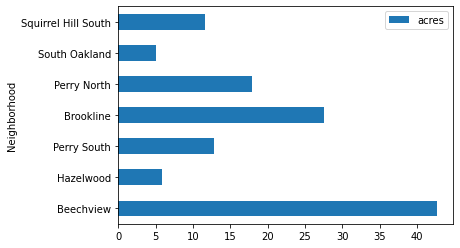

In [37]:
greenways_chart = greenways_chart.dropna() #had to drop NaN values again
greenways_chart.head(10).plot.barh(x='nhood', y='acres', xlabel = 'Neighborhood', ylabel = 'acres') #plotting

For some reason, Geopandas wouldn't let me set use the acres column in the map, so heres another chart using the area instead.

In [60]:
area_chart = greenways[["name", "area", "nhood"]]
area_chart.sort_values("area", ascending=False) 
#not dropping NaN values this time since pandas wouldn't let me drop them and sort in descending order.


,name,area,nhood
0,Spring Hill Spring Garden,2.064316e+06,NaN
1,Beechview Seldom Seen,1.858947e+06,Beechview
6,Allegheny River,1.523838e+06,NaN
4,Moore,1.201580e+06,Brookline
8,Bigelow,1.053815e+06,NaN
5,Observatory Hill Hollows,7.813766e+05,Perry North
3,Perry South,5.581352e+05,Perry South
9,Nine Mile Run,5.083942e+05,Squirrel Hill South
2,Hazelwood,2.566833e+05,Hazelwood
7,Oakcliffe,2.226447e+05,South Oakland


Heres the same table but using area instead of acres. As you can see, the ranking is still the same (ignoring the NaN values that could not be filtered out this time).

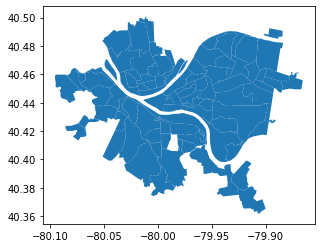

In [38]:
neighborhoods = geopandas.read_file('Neighborhoods_.shp') #import neighborhood map
neighborhoods.plot()

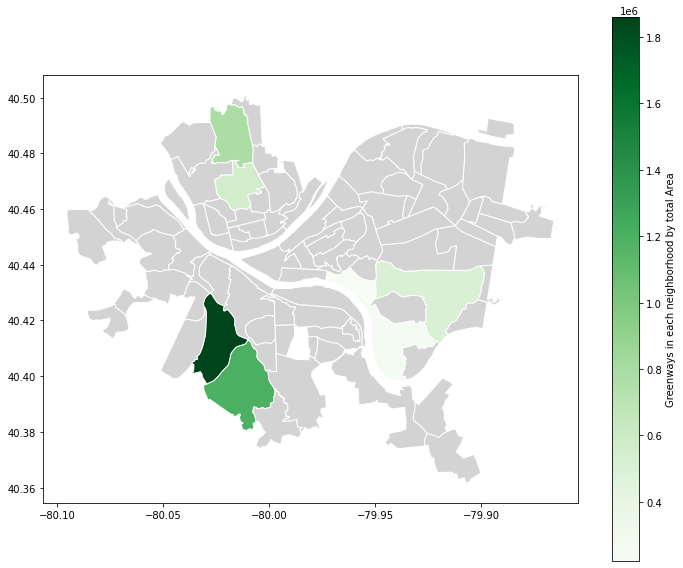

In [39]:
green_map = neighborhoods.merge(greenways, how = 'left', left_on = 'hood', right_on = 'nhood') 
#merging the neighborhood and greenway datasets

green_map.plot(column='area', cmap = 'Greens', edgecolor = 'White', legend = True, 
               legend_kwds = {'label': 'Greenways in each neighborhood by total Area'}, figsize = (12, 10), 
               missing_kwds = {'color': 'lightgrey'})
#plotting and customizing the map

Here is the final map of the neighborhoods by greenway area.